In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
import statsmodels.api as sm

In [3]:
data = pd.read_csv('V:\internship XOPA\predictive analytics\predictive_salary_cat-mod-filled-nan1.csv', index_col=0)

In [4]:
data.head()

,last_com_salary,exp,exp_yr_count,salary,American,Male,Masters's Degree,PhD Degree,Job Boards,Referred by employees,...,Director,Frontend Engineer,Frontend Engineer II,Manager,Sr Backend Engineer,Sr Frontend Engineer,Sr Manager,Team Lead,Administration Department,Analytics Department
id,,,,,,,,,,,,,,,,,,,,,
1,84291,171,1,120925,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,2,124947,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,3,126961,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,4,128977,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,84291,171,5,130995,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data['last_com_salary'].fillna(0, inplace=True)
data['exp'].fillna(0, inplace=True)
data.fillna(0, inplace=True)

data.to_csv('predictive_salary_cat-mod-filled-nan.csv')

In [6]:
data1 = data.drop('salary', axis=1)
X = data.drop('salary', axis=1).values
Y = data['salary'].values

In [7]:
X2 = sm.add_constant(data1)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.521e+04
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        11:35:22   Log-Likelihood:                -87049.
No. Observations:                8452   AIC:                         1.741e+05
Df Residuals:                    8427   BIC:                         1.743e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=32)

In [9]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
reg.intercept_

37203.105726109905

In [11]:
coeff_df = pd.DataFrame(reg.coef_, data1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
last_com_salary,0.285296
exp,-0.754974
exp_yr_count,2625.741066
American,195.374460
Male,327.846085
Masters's Degree,-156.836611
PhD Degree,-75.258790
Job Boards,166.387878
Referred by employees,980.811880
Backend Engineer,29992.265467


In [12]:
Y_predicted_train = reg.predict(X_train)

In [13]:
Y_predicted = reg.predict(X_test)

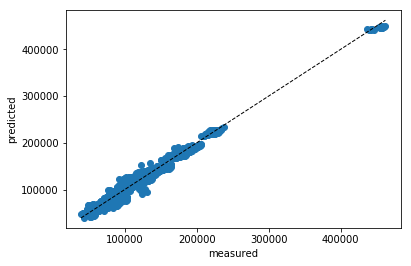

In [14]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_predicted)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [15]:
from sklearn import metrics
print('Mean Absolute Error of training data:', metrics.mean_absolute_error(Y_train, Y_predicted_train))  
print('Mean Squared Error of training data:', metrics.mean_squared_error(Y_train, Y_predicted_train))  
print('Root Mean Squared Error of training data:', np.sqrt(metrics.mean_squared_error(Y_train, Y_predicted_train)))

Mean Absolute Error of training data: 5578.108219510384
Mean Squared Error of training data: 51377888.29312416
Root Mean Squared Error of training data: 7167.837072166481


In [16]:
from sklearn import metrics
print('Mean Absolute Error of test data:', metrics.mean_absolute_error(Y_test, Y_predicted))  
print('Mean Squared Error of test data:', metrics.mean_squared_error(Y_test, Y_predicted))  
print('Root Mean Squared Error of test data:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error of test data: 5637.382400805059
Mean Squared Error of test data: 52844396.07372953
Root Mean Squared Error of test data: 7269.415112217043


In [17]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg, X, Y, cv=10)
print(cv_results)

[0.95514266 0.96078898 0.98081125 0.98396077 0.97603822 0.98431353
 0.98222788 0.98060535 0.97013728 0.96494551]


In [18]:
np.mean(cv_results)

0.973897143088165

In [19]:
cv_results = cross_val_score(reg, X, Y, cv=4)
print(cv_results)

[0.94654388 0.97924106 0.98255406 0.95849836]


# Suggesting company whether employee salary has to be increased or not in the next year

In [20]:
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [21]:
salary_predicted_total = reg.predict(X)
salary_predicted_total

array([129678.31832931, 132253.65618619, 134828.99404307, ...,
        96731.03246917,  99306.37032605, 101881.70818293])

In [22]:
salary_predicted_total = salary_predicted_total.tolist()
data['predicted_salary'] = salary_predicted_total

In [23]:
final = data[['exp_yr_count','salary','predicted_salary']].round(1)
final.head()

,exp_yr_count,salary,predicted_salary
id,,,
1,1,120925,129678.3
1,2,124947,132253.7
1,3,126961,134829.0
1,4,128977,137404.3
1,5,130995,139979.7


In [76]:
final['salary_difference'] = final['salary'] - final['predicted_salary']
final['salary_pct_dif'] = 100*final['salary_difference']/final['salary']
final['salary_pct_dif'] = final['salary_pct_dif'].round(2)

In [77]:
final.head()

,exp_yr_count,salary,predicted_salary,salary_difference,salary_pct_dif
id,,,,,
1,1,120925,129678.3,-8753.3,-7.24
1,2,124947,132253.7,-7306.7,-5.85
1,3,126961,134829.0,-7868.0,-6.20
1,4,128977,137404.3,-8427.3,-6.53
1,5,130995,139979.7,-8984.7,-6.86


In [78]:
rating = pd.read_csv('rating.csv', index_col=0)

In [79]:
rating = rating[['year','exp_yr_count','Rating']]

In [80]:
model = pd.merge(rating,final,on=['id','exp_yr_count'])

In [81]:
avg_rating = pd.read_csv('avg-rating.csv', index_col=0)

In [82]:
avg_rating.head()

,avg_rating
id,
1,3.202
2,3.937
3,3.735
4,3.668
5,3.474


In [83]:
totalpredic = pd.merge(model ,avg_rating,on='id')

In [84]:
totalpredic = totalpredic.reset_index()

Increase salary by more % than avg increase and give him strategic training
Increase salary by more % than avg increase
not much change in salary
not much change in salary, give him strategic training

In [85]:
totalpredic.head()

,id,year,exp_yr_count,Rating,salary,predicted_salary,salary_difference,salary_pct_dif,avg_rating
0,1,2010,1,3.39,120925,129678.3,-8753.3,-7.24,3.202
1,1,2011,2,2.54,124947,132253.7,-7306.7,-5.85,3.202
2,1,2012,3,2.72,126961,134829.0,-7868.0,-6.20,3.202
3,1,2013,4,3.50,128977,137404.3,-8427.3,-6.53,3.202
4,1,2014,5,3.11,130995,139979.7,-8984.7,-6.86,3.202


In [86]:
#regarding salary recommendation
totalpredic['salary_recommendation'] = 'no change'
totalpredic.loc[(totalpredic.salary_pct_dif < -8 ) & (totalpredic.Rating >= 3.4), 'salary_recommendation'] = 'increase salary more than 5%'
totalpredic.loc[(totalpredic.salary_pct_dif < -4 ) & (totalpredic.Rating >= 3.4), 'salary_recommendation'] = 'increase salary more than 3%'
totalpredic.loc[(totalpredic.salary_pct_dif < -8 ) & (totalpredic.avg_rating >= 3.4), 'salary_recommendation'] = 'increase salary more than 10%'
totalpredic.loc[(totalpredic.salary_pct_dif < -4 ) & (totalpredic.avg_rating >= 3.4), 'salary_recommendation'] = 'increase salary more than 5%'

#regarding training recommendation
totalpredic['training recommendation'] = 'not required'
totalpredic.loc[(totalpredic.Rating <= 2.9), 'training recommendation'] = 'current training need'
totalpredic.loc[(totalpredic.Rating >= 3.8) | (totalpredic.avg_rating >= 3.8), 'training recommendation'] = 'strategic training need'

In [91]:
model = totalpredic[['id','year','exp_yr_count','Rating','avg_rating','salary_pct_dif','salary_recommendation','training recommendation']]

In [92]:
model

,id,year,exp_yr_count,Rating,avg_rating,salary_pct_dif,salary_recommendation,training recommendation
0,1,2010,1,3.39,3.202,-7.24,no change,not required
1,1,2011,2,2.54,3.202,-5.85,no change,current training need
2,1,2012,3,2.72,3.202,-6.20,no change,current training need
3,1,2013,4,3.50,3.202,-6.53,increase salary more than 3%,not required
4,1,2014,5,3.11,3.202,-6.86,no change,not required
5,1,2015,6,3.32,3.202,-7.17,no change,not required
6,1,2016,7,3.34,3.202,-8.31,no change,not required
7,1,2017,8,3.26,3.202,-0.29,no change,not required
8,1,2018,9,4.02,3.202,-0.58,no change,strategic training need
9,1,2019,10,2.82,3.202,-0.86,no change,current training need
